Chapter 9

9-1 순차 데이터와 순환 신경망

9-2 순환 신경망을 만들고 텍스트를 분류

In [1]:
#텐서플로에서 IMDB 데이터 세트 불러오기
import numpy as np
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
#훈련 세트 크기 확인
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [3]:
#훈련 세트 샘플 확인
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [4]:
#훈련 세트에서 2 제외
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w>2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
#어휘 사전 내려받기
word_to_index = imdb.get_word_index()
word_to_index['movie']

1641221/1641221 [==============================] - 0s 0us/step


17

In [6]:
#훈련 세트의 정수를 영단어로 변환
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w - 3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [8]:
#훈련 샘플 길이 확인
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [10]:
#훈련 세트의 타깃 데이트 확인
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [12]:
#검정 세트 준비
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [13]:
#텐서플로로 샘플의 길이 맞추기
from tensorflow.keras.preprocessing import sequence

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [14]:
#길이를 조정한 훈련 세트의 크기와 샘플 확인
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [15]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [16]:
#텐서플로로 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [17]:
print(x_train_onehot.shape)

(20000, 100, 100)


In [18]:
print(x_train_onehot.nbytes)

800000000


In [21]:
#순환 신경망 클래스 구현
import tensorflow as tf

class RecurrentNetwork:

    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells           #셀 개수
        self.batch_size = batch_size     #배치 크기
        self.w1h = None                  #은닉 상태에 대한 가중치
        self.w1x = None                  #입력에 대한 가중치
        self.b1 = None                   #순환층의 절편
        self.w2 = None                   #출력층의 가중치
        self.b2 = None                   #출력층의 절편
        self.h = None                    #순환층의 활성화 출력
        self.losses = []                 #훈련 손실
        self.val_losses = []             #검증 손실
        self.lr = learning_rate          #학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   #은닉 상태를 초기화
        seq = np.swapaxes(x, 0, 1) #배치 차원과 타임 스텝 차원을 바꿈
        for x in seq: #순환 층의 선형 식을 계산
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    #활성화 함수를 적용
            self.h.append(h)                   #역전파를 위해 은닉 상태 저장
            z2 = np.dot(h, self.w2) + self.b2  #출력층의 선형 식을 계산
        return z2

    def backprop(self, x, err):
        m = len(x)       #샘플 개수
        w2_grad = np.dot(self.h[-1].T, err) / m  #출력층의 가중치와 절편에 대한 그래디언트를 계산
        b2_grad = np.sum(err) / m
        seq = np.swapaxes(x, 0, 1) #배치 차원과 타임 스텝 차원을 바꿈

        w1h_grad = w1x_grad = b1_grad = 0

        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2) #셀 직전까지 그래디언트를 계산
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]): #모든 타임 스텝을 거슬러가면서 그래디언트를 전파
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2) #이전 타임 스텝의 셀 직전까지 그래디언트를 계산

        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m

        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

    def sigmoid(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))              #시그모이드 계산
        return a

    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()

        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() #(셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() #(특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)                           #은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   #(셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    #은닉층과 출력층의 가중치를 초기화
        for i in range(epochs): #epochs만큼 반복
            print('에포크', i, end=' ')
            batch_losses = [] # 제너레이터 함수에서 반환한 미니배치를 순환
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch) #안전한 로그 계산을 위해 클리핑
                a = np.clip(a, 1e-10, 1-1e-10)
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a))) #로그 손실과 규제 손실을 더하여 리스트에 추가
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            self.update_val_loss(x_val, y_val) #검증 세트에 대한 손실을 계산

    def gen_batch(self, x, y): #미니배치 제너레이터 함수
        length = len(x)
        bins = length // self.batch_size #미니배치 횟수
        if length % self.batch_size:
            bins += 1                    #나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞음
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   #batch_size만큼 슬라이싱하여 반환

    def training(self, x, y):
        m = len(x)                #샘플 개수를 저장
        z = self.forpass(x)       #정방향 계산을 수행
        a = self.sigmoid(z)       #활성화 함수를 적용
        err = -(y - a)            #오차를 계산
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err) #오차를 역전파하여 그래디언트를 계산
        self.w1h -= self.lr * w1h_grad #셀의 가중치와 절편을 업데이트
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        self.w2 -= self.lr * w2_grad #출력층의 가중치와 절편을 업데이트
        self.b2 -= self.lr * b2_grad
        return a

    def predict(self, x):
        z = self.forpass(x)          #정방향 계산을 수행
        return z > 0                 #스텝 함수를 적용

    def score(self, x, y):
        return np.mean(self.predict(x) == y.reshape(-1, 1)) #예측과 타깃 열 벡터를 비교하여 True의 비율을 반환

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            #정방향 계산을 수행
        a = self.sigmoid(z)                #활성화 함수를 적용
        a = np.clip(a, 1e-10, 1-1e-10)     #출력 값을 클리핑
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

In [22]:
#순환 신경망 모델 훈련
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

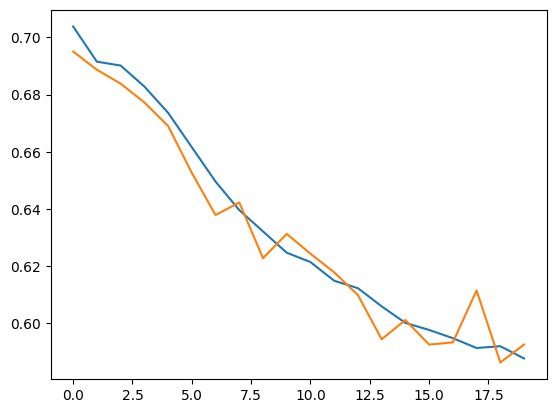

In [35]:
#훈련, 검증 세트에 대한 손실 그래프
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [24]:
#검정 세트 정확도 평가
rn.score(x_val_onehot, y_val)

0.6782

9-3 텐서플로로 순환 신경망 생성

In [31]:
#순환 신경망에 필요한 클래스 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [32]:
#모델 생성
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [33]:
#모델 컴파일하고 훈련
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32,
                    validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 18s 26ms/step - loss: 0.6991 - accuracy: 0.5121 - val_loss: 0.6945 - val_accuracy: 0.5218
Epoch 2/20
625/625 [==============================] - 16s 25ms/step - loss: 0.6909 - accuracy: 0.5307 - val_loss: 0.6861 - val_accuracy: 0.5514
Epoch 3/20
625/625 [==============================] - 14s 23ms/step - loss: 0.6809 - accuracy: 0.5619 - val_loss: 0.6750 - val_accuracy: 0.5778
Epoch 4/20
625/625 [==============================] - 14s 23ms/step - loss: 0.6653 - accuracy: 0.5964 - val_loss: 0.6866 - val_accuracy: 0.5640
Epoch 5/20
625/625 [==============================] - 16s 25ms/step - loss: 0.6460 - accuracy: 0.6278 - val_loss: 0.6381 - val_accuracy: 0.6376
Epoch 6/20
625/625 [==============================] - 15s 25ms/step - loss: 0.6284 - accuracy: 0.6482 - val_loss: 0.6427 - val_accuracy: 0.6274
Epoch 7/20
625/625 [==============================] - 15s 23ms/step - loss: 0.6156 - accuracy: 0.6647 - val_loss: 0.6074 - val_accuracy:

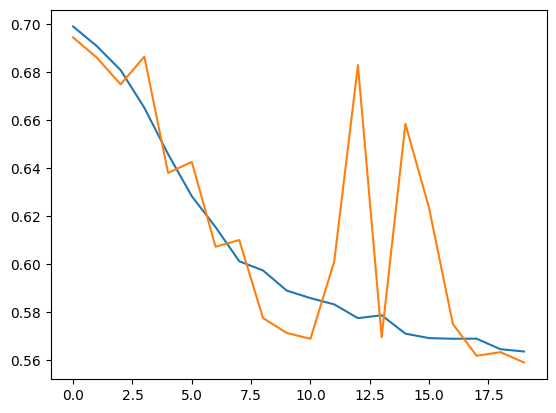

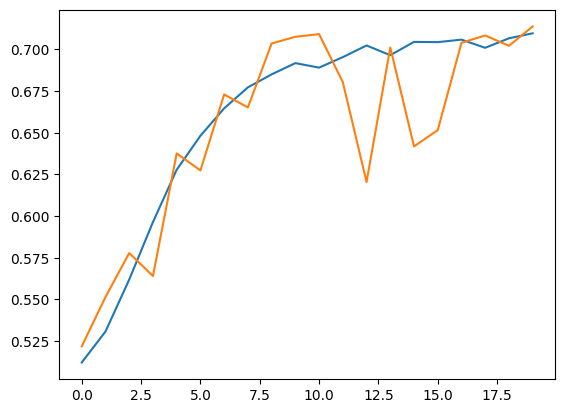

In [37]:
#훈련, 검증 세트에 대한 손실 그래프와 정확도 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [39]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)

In [40]:
print(accuracy)

0.7138000130653381


In [41]:
#Embedding 클래스 임포트
from tensorflow.keras.layers import Embedding

In [42]:
#훈련 데이터 준비
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [43]:
#샘플 길이 맞추기
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [44]:
#모델 생성
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [45]:
#모델 컴파일하고 훈련
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32,
                        validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 20s 29ms/step - loss: 0.6676 - accuracy: 0.5727 - val_loss: 0.6291 - val_accuracy: 0.6372
Epoch 2/10
625/625 [==============================] - 16s 25ms/step - loss: 0.5113 - accuracy: 0.7537 - val_loss: 0.4685 - val_accuracy: 0.7884
Epoch 3/10
625/625 [==============================] - 20s 32ms/step - loss: 0.3929 - accuracy: 0.8314 - val_loss: 0.4196 - val_accuracy: 0.8178
Epoch 4/10
625/625 [==============================] - 16s 26ms/step - loss: 0.3439 - accuracy: 0.8566 - val_loss: 0.4193 - val_accuracy: 0.8108
Epoch 5/10
625/625 [==============================] - 16s 26ms/step - loss: 0.3071 - accuracy: 0.8772 - val_loss: 0.4118 - val_accuracy: 0.8176
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 0.2799 - accuracy: 0.8909 - val_loss: 0.4190 - val_accuracy: 0.8222
Epoch 7/10
625/625 [==============================] - 17s 26ms/step - loss: 0.2579 - accuracy: 0.8989 - val_loss: 0.4598 - val_accuracy:

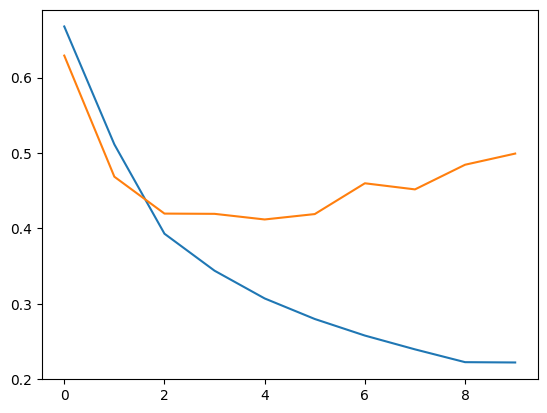

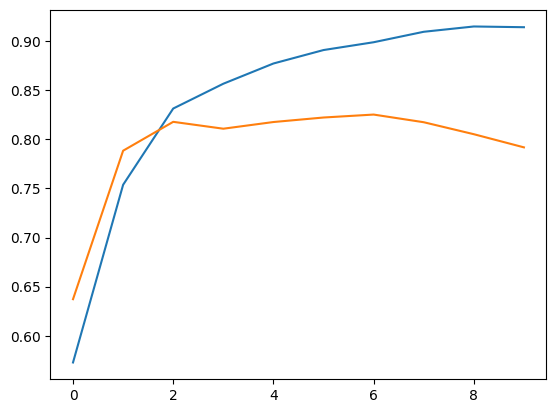

In [46]:
#손실 그래프와 정확도 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [52]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)

In [53]:
print(accuracy)

0.7918000221252441


9-4 LSTM 순환 신경망을 만들고 텍스트를 분류

In [54]:
#LSTM 신경망 만들기
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 lstm (LSTM)                 (None, 8)                 1312      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [56]:
#모델 훈련
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32,
                         validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 28s 42ms/step - loss: 0.4276 - accuracy: 0.8217 - val_loss: 0.3738 - val_accuracy: 0.8364
Epoch 2/10
625/625 [==============================] - 33s 52ms/step - loss: 0.3348 - accuracy: 0.8595 - val_loss: 0.3561 - val_accuracy: 0.8464
Epoch 3/10
625/625 [==============================] - 24s 38ms/step - loss: 0.3102 - accuracy: 0.8695 - val_loss: 0.3622 - val_accuracy: 0.8388
Epoch 4/10
625/625 [==============================] - 24s 39ms/step - loss: 0.2934 - accuracy: 0.8746 - val_loss: 0.3640 - val_accuracy: 0.8462
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 0.2786 - accuracy: 0.8843 - val_loss: 0.3728 - val_accuracy: 0.8398
Epoch 6/10
625/625 [==============================] - 25s 40ms/step - loss: 0.2705 - accuracy: 0.8872 - val_loss: 0.3840 - val_accuracy: 0.8368
Epoch 7/10
625/625 [==============================] - 25s 40ms/step - loss: 0.2551 - accuracy: 0.8940 - val_loss: 0.4000 - val_accuracy:

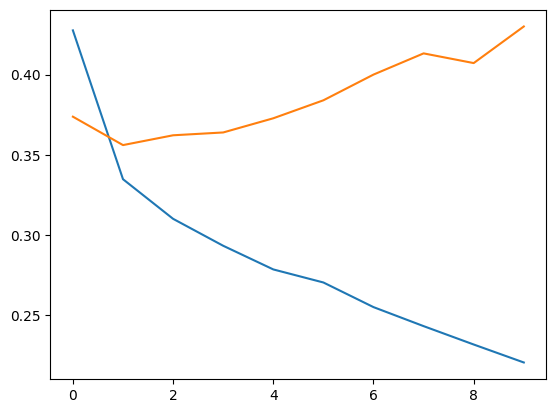

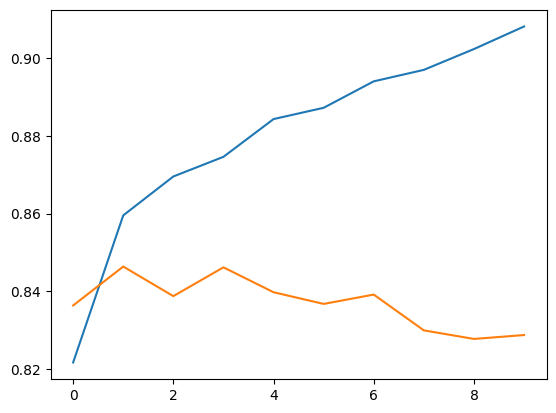

In [57]:
#손실 그래프와 정확도 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [58]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)

In [59]:
print(accuracy)

0.8288000226020813
